## Transfer Learning Alexnet  using Keras

#### Why does AlexNet achieve better results?

1. **Relu activation function is used.**

Relu function: f (x) = max (0, x)

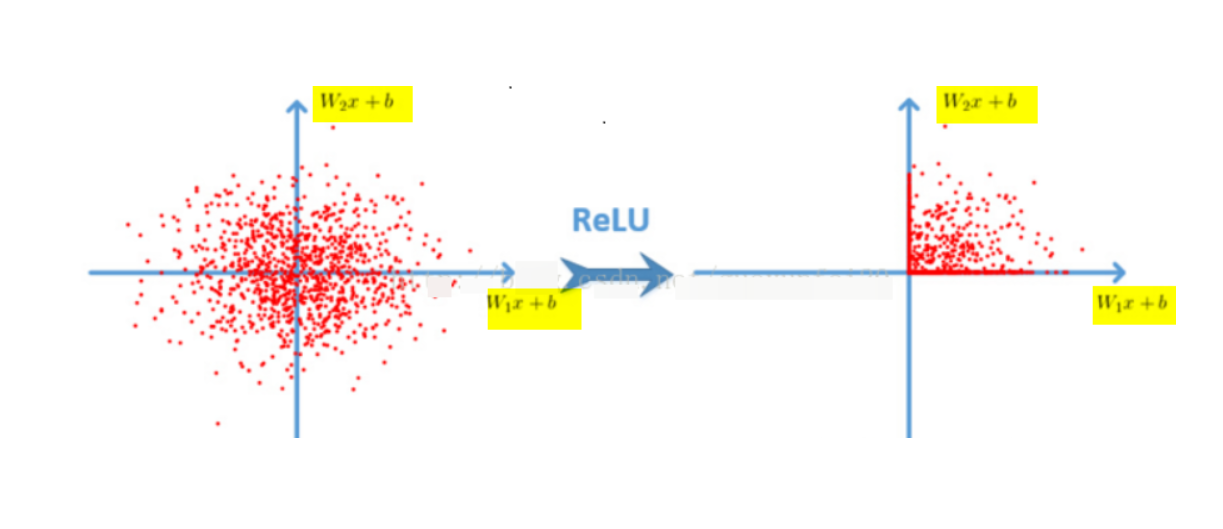

ReLU-based deep convolutional networks are trained several times faster than tanh and sigmoid- based networks. The following figure shows the number of iterations for a four-layer convolutional network based on CIFAR-10 that reached 25% training error in tanh and ReLU:


2. **Standardization ( Local Response Normalization )**

After using ReLU f (x) = max (0, x), you will find that the value after the activation function has no range like the tanh and sigmoid functions, so a normalization will usually be done after ReLU, and the LRU is a steady proposal (Not sure here, it should be proposed?) One method in neuroscience is called "Lateral inhibition", which talks about the effect of active neurons on its surrounding neurons.

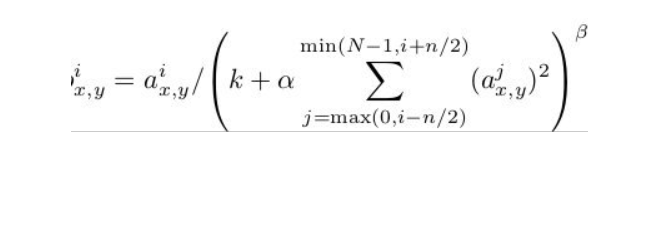

3. **Dropout**

Dropout is also a concept often said, which can effectively prevent overfitting of neural networks. Compared to the general linear model, a regular method is used to prevent the model from overfitting. In the neural network, Dropout is implemented by modifying the structure of the neural network itself. For a certain layer of neurons, randomly delete some neurons with a defined probability, while keeping the individuals of the input layer and output layer neurons unchanged, and then update the parameters according to the learning method of the neural network. In the next iteration, rerandom Remove some neurons until the end of training.

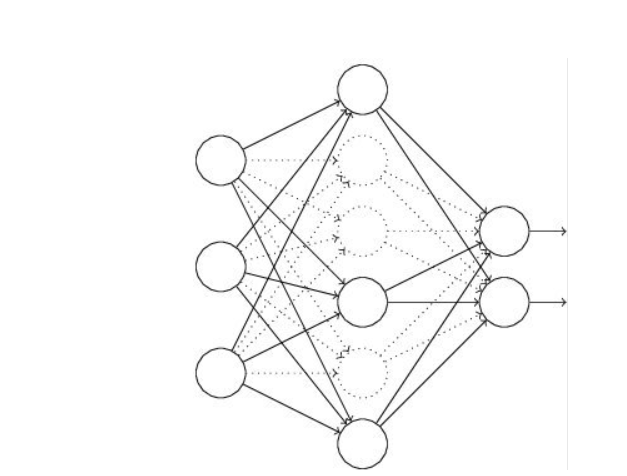

4. **Enhanced Data ( Data Augmentation )**



**In deep learning, when the amount of data is not large enough, there are generally 4 solutions:**

>  Data augmentation- artificially increase the size of the training set-create a batch of "new" data from existing data by means of translation, flipping, noise

>  Regularization——The relatively small amount of data will cause the model to overfit, making the training error small and the test error particularly large. By adding a regular term after the Loss Function , the overfitting can be suppressed. The disadvantage is that a need is introduced Manually adjusted hyper-parameter.

>  Dropout- also a regularization method. But different from the above, it is achieved by randomly setting the output of some neurons to zero

>  Unsupervised Pre-training- use Auto-Encoder or RBM's convolution form to do unsupervised pre-training layer by layer, and finally add a classification layer to do supervised Fine-Tuning


#### Code Of Alexnet Structure Using Keras

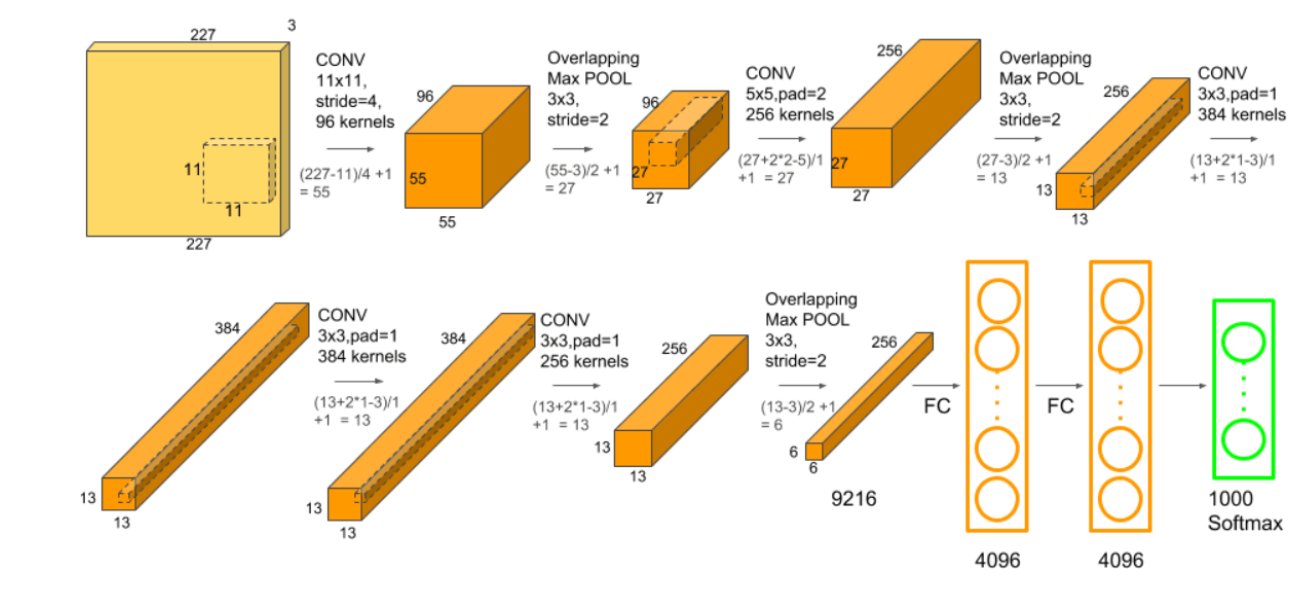

In [7]:
import tensorflow as tf

In [8]:
tf.__version__

'2.2.0'

In [1]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D,BatchNormalization

#### To get the same output size -- use padding = same

# (3) Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(227*227*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

'''
# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())
'''

# Output Layer
model.add(Dense(1000))
model.add(Activation('softmax'))

model.summary()





Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
activation_1 (Activation)    (None, 27, 27, 256)       0         
_________________________________________